# Veriframe demo

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from veriframe.veriframe import VeriFrame

## Create the VeriFrame object

### Load test colocations as a DataFrame

In [3]:
df = pd.read_csv("../tests/data/colocs.csv")
df.tail()

,time,hs_obs,tp_obs,hs_hds,tp_hds,lon_obs,lat_obs,lon_hds,lat_hds,dpm_hds
7220,2024-05-31 20:00:00,1.628247,9.385050,2.060360,9.784519,-119.536,32.403,-119.6,32.5,310.40317
7221,2024-05-31 21:00:00,1.840625,8.679373,2.038291,9.753291,-119.536,32.403,-119.6,32.5,310.22955
7222,2024-05-31 22:00:00,1.719119,9.796905,2.019800,9.724879,-119.536,32.403,-119.6,32.5,310.09146
7223,2024-05-31 23:00:00,1.664624,8.407856,2.004540,9.699522,-119.536,32.403,-119.6,32.5,309.99423
7224,2024-06-01 00:00:00,1.659110,9.359562,1.992092,9.677349,-119.536,32.403,-119.6,32.5,309.95470


### Create a datetime index

In [4]:
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)
df.tail()

,hs_obs,tp_obs,hs_hds,tp_hds,lon_obs,lat_obs,lon_hds,lat_hds,dpm_hds
time,,,,,,,,,
2024-05-31 20:00:00,1.628247,9.385050,2.060360,9.784519,-119.536,32.403,-119.6,32.5,310.40317
2024-05-31 21:00:00,1.840625,8.679373,2.038291,9.753291,-119.536,32.403,-119.6,32.5,310.22955
2024-05-31 22:00:00,1.719119,9.796905,2.019800,9.724879,-119.536,32.403,-119.6,32.5,310.09146
2024-05-31 23:00:00,1.664624,8.407856,2.004540,9.699522,-119.536,32.403,-119.6,32.5,309.99423
2024-06-01 00:00:00,1.659110,9.359562,1.992092,9.677349,-119.536,32.403,-119.6,32.5,309.95470


### Instantiate VeriFrame from the DataFrame

In [6]:
vf = VeriFrame(
    df,
    ref_col="hs_obs",
    verify_col="hs_hds",
    ref_label="NDBC",
    verify_label="Hindcast",
)

# Set the stats to display in the graphs
vf.stats = ["bias", "rmsd", "si"]

## Analysis

In [7]:
vf.stats_table(freq="season")

,all,DJF,JJA,MAM,SON
N,7225.000000,2171.000000,1283.000000,2208.000000,1563.000000
BIAS,0.087967,0.128422,0.141067,0.084007,-0.006220
RMSD,0.261194,0.314891,0.237906,0.235195,0.230277
SI,0.114405,0.115516,0.122349,0.097677,0.114102
MAD,0.204343,0.238245,0.201133,0.192248,0.176976
MRAD,0.105454,0.104686,0.141249,0.095094,0.091774
NBIAS,0.087967,0.128422,0.141067,0.084007,-0.006220
NRMSD,0.261194,0.314891,0.237906,0.235195,0.230277


### Check the available plotting method

In [8]:
[method for method in dir(vf) if method.startswith("plot_")]

['plot_cdf',
 'plot_density_contour',
 'plot_density_scatter',
 'plot_pdf',
 'plot_qq',
 'plot_regression',
 'plot_scatter',
 'plot_scatter_polar',
 'plot_scatter_qq',
 'plot_timeseries']

### Plotting simple scatter

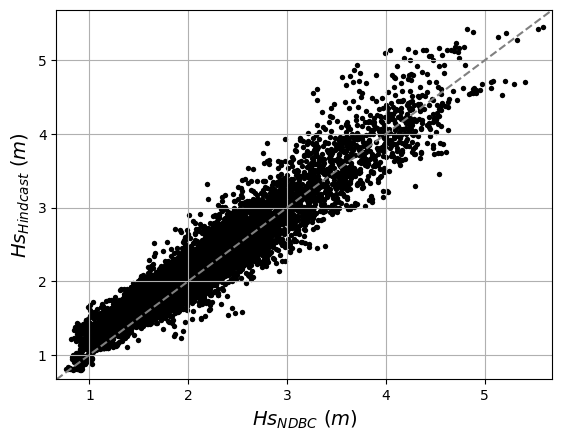

In [9]:
ax = vf.plot_scatter()

### Scatter and qq

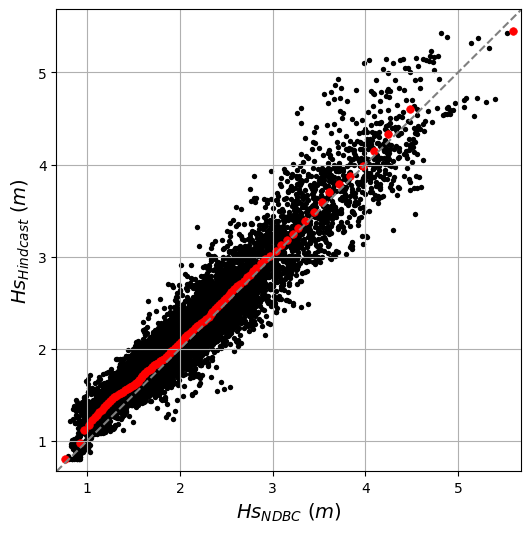

In [10]:
ax = vf.plot_scatter_qq()

### Display stats

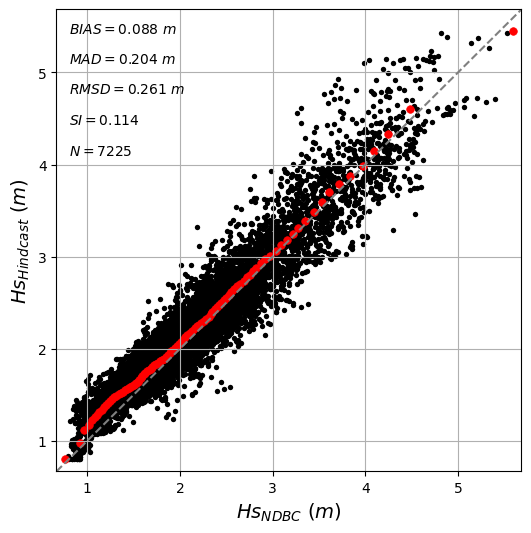

In [11]:
ax = vf.plot_scatter_qq()
ax = vf.add_stats(ax=ax, stats=["bias", "mad", "rmsd", "si", "n"])

### Plot and display linear regression

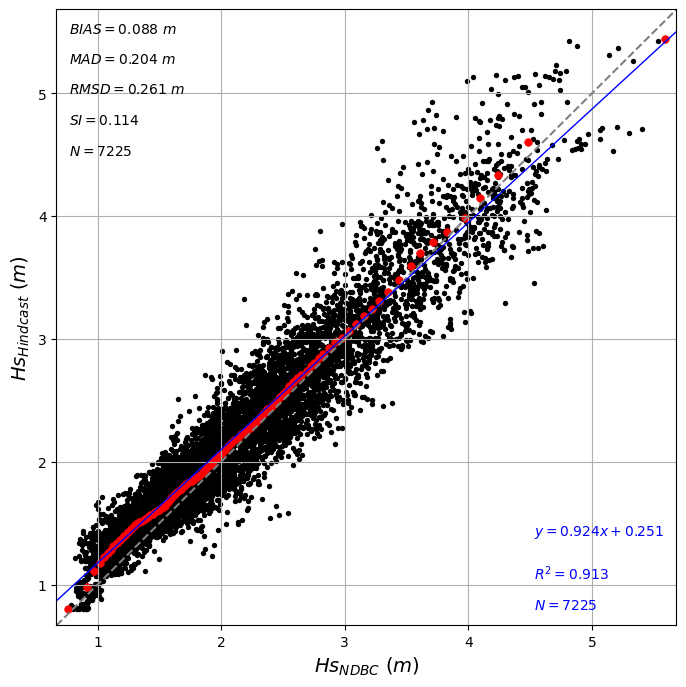

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

ax = vf.plot_scatter_qq(ax=ax)
ax = vf.add_stats(ax=ax, stats=["bias", "mad", "rmsd", "si", "n"])
ax = vf.plot_regression(ax=ax, color="blue")
ax = vf.add_regression(ax=ax, color="blue", loc=4)

### Plot density contour

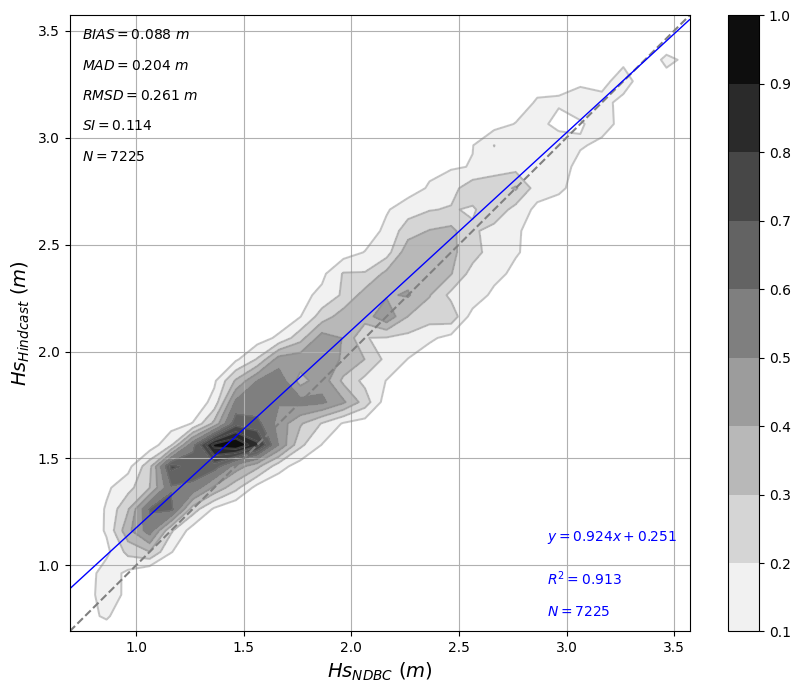

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = vf.plot_density_contour(ax=ax, binsize=0.1, cmap="gray_r")
ax = vf.add_stats(ax=ax, stats=["bias", "mad", "rmsd", "si", "n"])
ax = vf.plot_regression(ax=ax, color="blue")
ax = vf.add_regression(ax=ax, color="blue", loc=4)

### Plot density scatter

/source/veriframe/src/veriframe/veriframe.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self[self.ref_col][idx], self[self.verify_col][idx], z[idx]


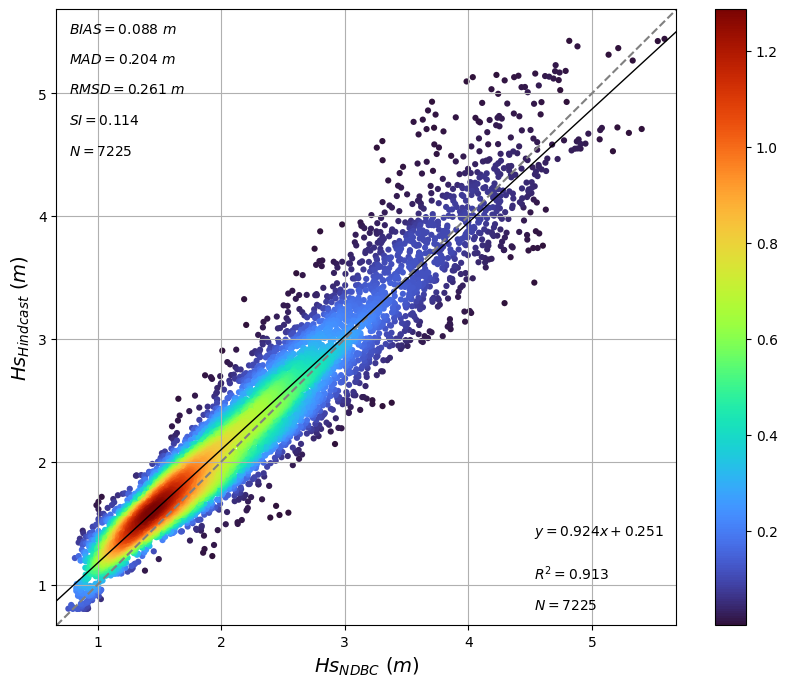

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = vf.plot_density_scatter(ax=ax, cmap="turbo")
ax = vf.add_stats(ax=ax, stats=["bias", "mad", "rmsd", "si", "n"])
ax = vf.plot_regression(ax=ax, color="k")
ax = vf.add_regression(ax=ax, color="k", loc=4)

### Plot distributions

<Axes: xlabel='$Hs$ ($m$)', ylabel='Density'>

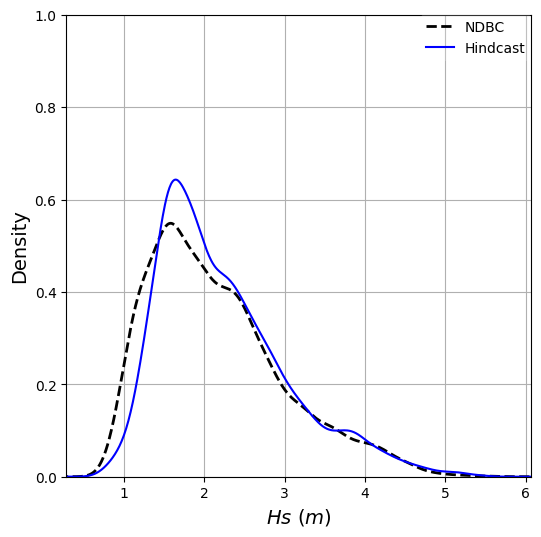

In [15]:
vf.plot_pdf()

<Axes: xlabel='$Hs$ ($m$)', ylabel='Cumulative density'>

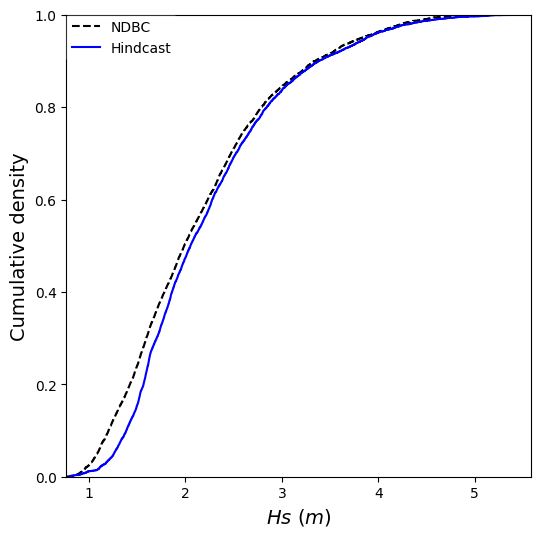

In [16]:
vf.plot_cdf()

### Polar scatter plot

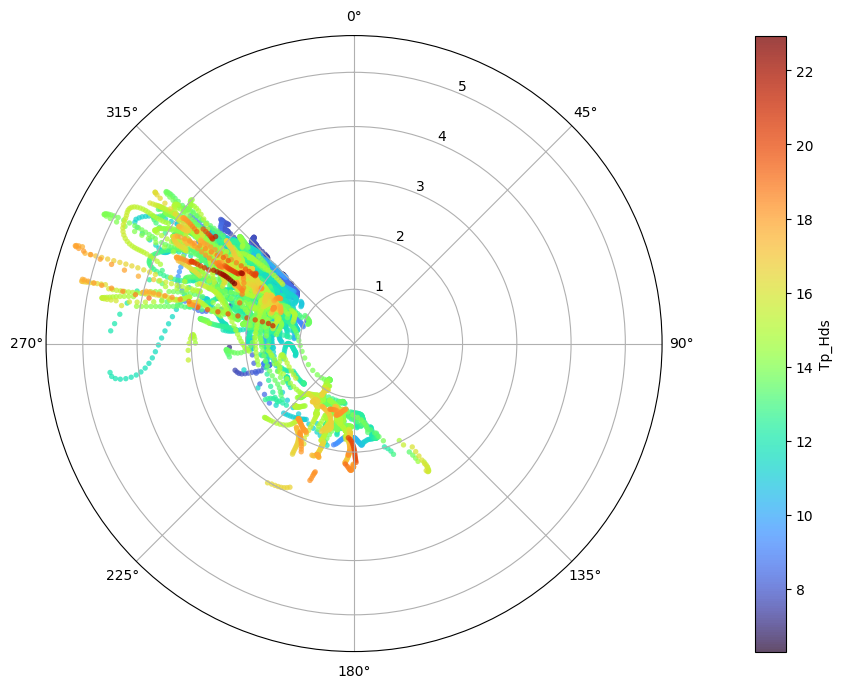

In [17]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection="polar"))
ax = vf.plot_scatter_polar(ax=ax, theta="dpm_hds", radius="hs_hds", c="tp_hds", cmap="turbo", colorbar=True)

### Plot timeseries

(0.0, 6.0)

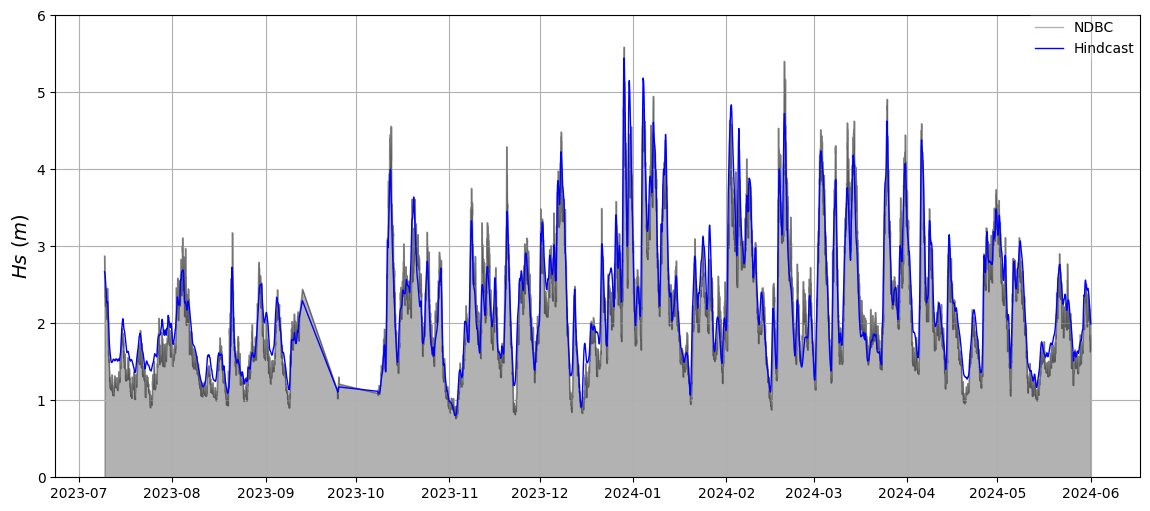

In [18]:
ax = vf.plot_timeseries(fill_under_obs=True)
ax.set_ylim([0, 6])